## Credit Card Default Predictions

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
pd. set_option('display.max_columns', None)
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the Dataset
df = pd.read_csv('Credit_Card_Defaulter_Prediction.csv')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,F,University,Married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,Y
1,2,120000,F,University,Single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,Y
2,3,90000,F,University,Single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,N
3,4,50000,F,University,Married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,N
4,5,50000,M,University,Married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,M,High School,Married,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,N
29996,29997,150000,M,High School,Single,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,N
29997,29998,30000,M,University,Single,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,Y
29998,29999,80000,M,High School,Married,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,Y


In [3]:
# Rename Columns for Consistency
df1 = df.rename(columns={'PAY_0': 'PAY_1', 'LIMIT_BAL': 'CREDIT_LIMIT', 'default ': 'DEFAULT'})

In [4]:
# Check for Missing Values
df1.isnull().sum()

ID              0
CREDIT_LIMIT    0
SEX             0
EDUCATION       0
MARRIAGE        0
AGE             0
PAY_1           0
PAY_2           0
PAY_3           0
PAY_4           0
PAY_5           0
PAY_6           0
BILL_AMT1       0
BILL_AMT2       0
BILL_AMT3       0
BILL_AMT4       0
BILL_AMT5       0
BILL_AMT6       0
PAY_AMT1        0
PAY_AMT2        0
PAY_AMT3        0
PAY_AMT4        0
PAY_AMT5        0
PAY_AMT6        0
DEFAULT         0
dtype: int64

In [5]:
# Check for Duplicates
df1.duplicated().sum()

0

In [6]:
# Get Descriptive Statistics
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
CREDIT_LIMIT,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0
PAY_6,30000.0,-0.291100,1.149988,-2.0,-1.00,0.0,0.00,8.0
BILL_AMT1,30000.0,51223.330900,73635.860576,-165580.0,3558.75,22381.5,67091.00,964511.0


In [7]:
# Check Data Types and Null Values
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            30000 non-null  int64 
 1   CREDIT_LIMIT  30000 non-null  int64 
 2   SEX           30000 non-null  object
 3   EDUCATION     30000 non-null  object
 4   MARRIAGE      30000 non-null  object
 5   AGE           30000 non-null  int64 
 6   PAY_1         30000 non-null  int64 
 7   PAY_2         30000 non-null  int64 
 8   PAY_3         30000 non-null  int64 
 9   PAY_4         30000 non-null  int64 
 10  PAY_5         30000 non-null  int64 
 11  PAY_6         30000 non-null  int64 
 12  BILL_AMT1     30000 non-null  int64 
 13  BILL_AMT2     30000 non-null  int64 
 14  BILL_AMT3     30000 non-null  int64 
 15  BILL_AMT4     30000 non-null  int64 
 16  BILL_AMT5     30000 non-null  int64 
 17  BILL_AMT6     30000 non-null  int64 
 18  PAY_AMT1      30000 non-null  int64 
 19  PAY_

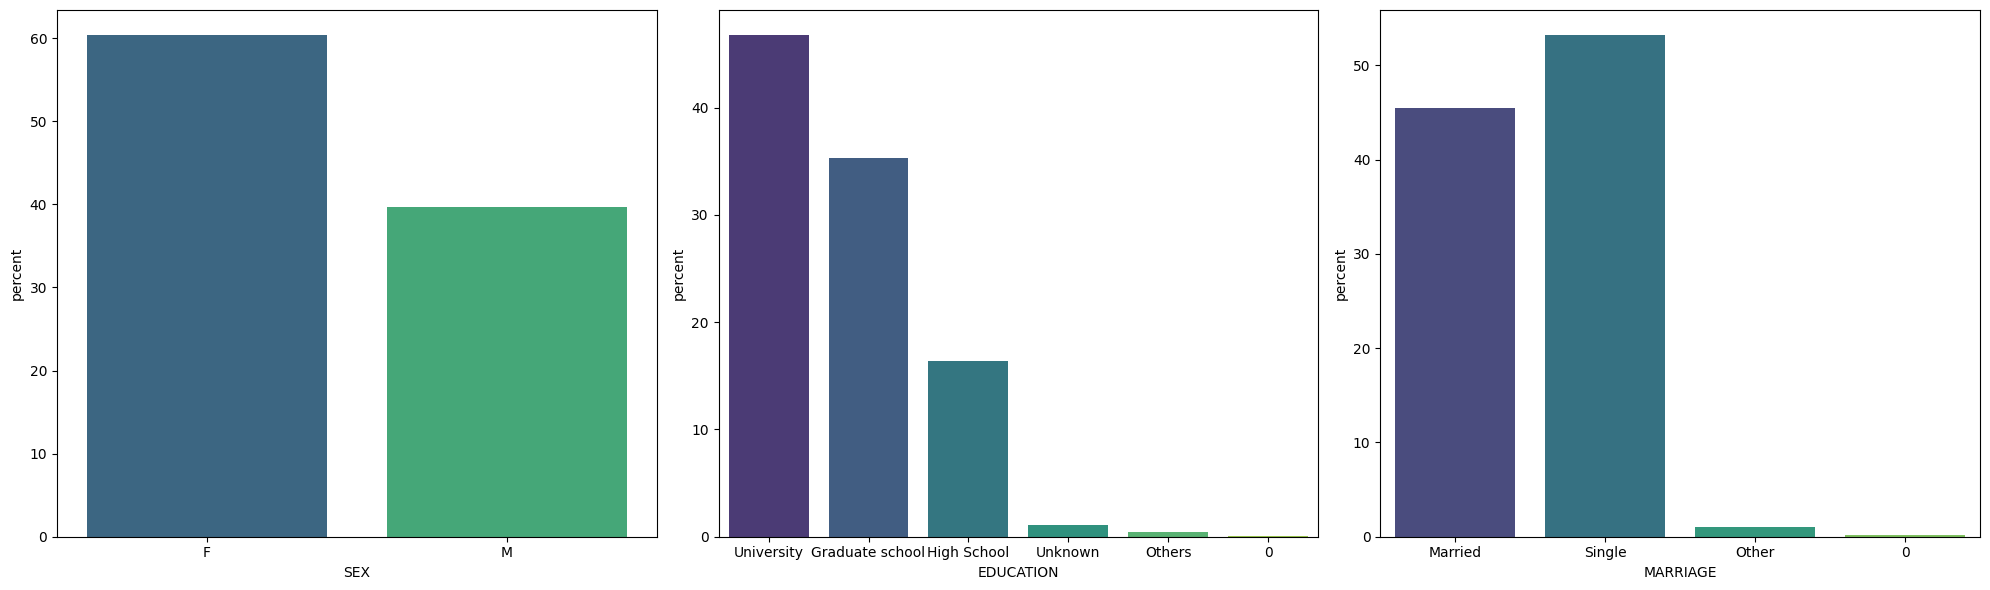

In [8]:
# CountPlot for Categorical Variables
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
sns.countplot(x=df1['SEX'], palette='viridis', stat='percent')

plt.subplot(1, 3, 2)
sns.countplot(x=df1['EDUCATION'], palette='viridis', stat='percent')

plt.subplot(1, 3, 3)
sns.countplot(x=df1['MARRIAGE'], palette='viridis', stat='percent')

plt.tight_layout()
plt.show()

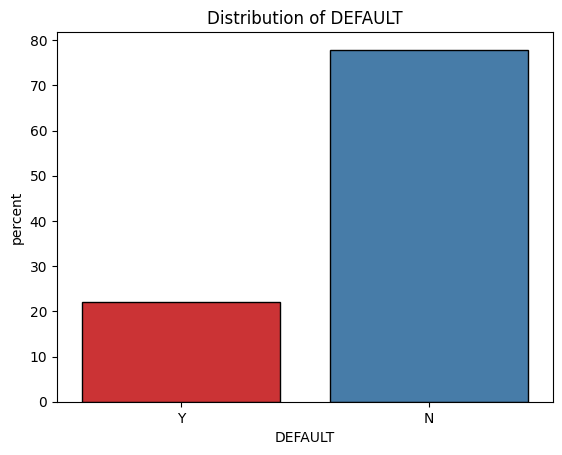

In [9]:
# Target Variable Distribution
sns.countplot(x=df1['DEFAULT'], stat='percent', palette='Set1', ec='black')
plt.title("Distribution of DEFAULT")
plt.show()

In [10]:
# Combine Rare Categories
df1['EDUCATION'] = df1['EDUCATION'].replace({'Unknown': 'Other', 'Others': 'Other', '0': 'Other'})
df1['MARRIAGE'] = df1['MARRIAGE'].replace({'Other': 'Other', '0': 'Other'})

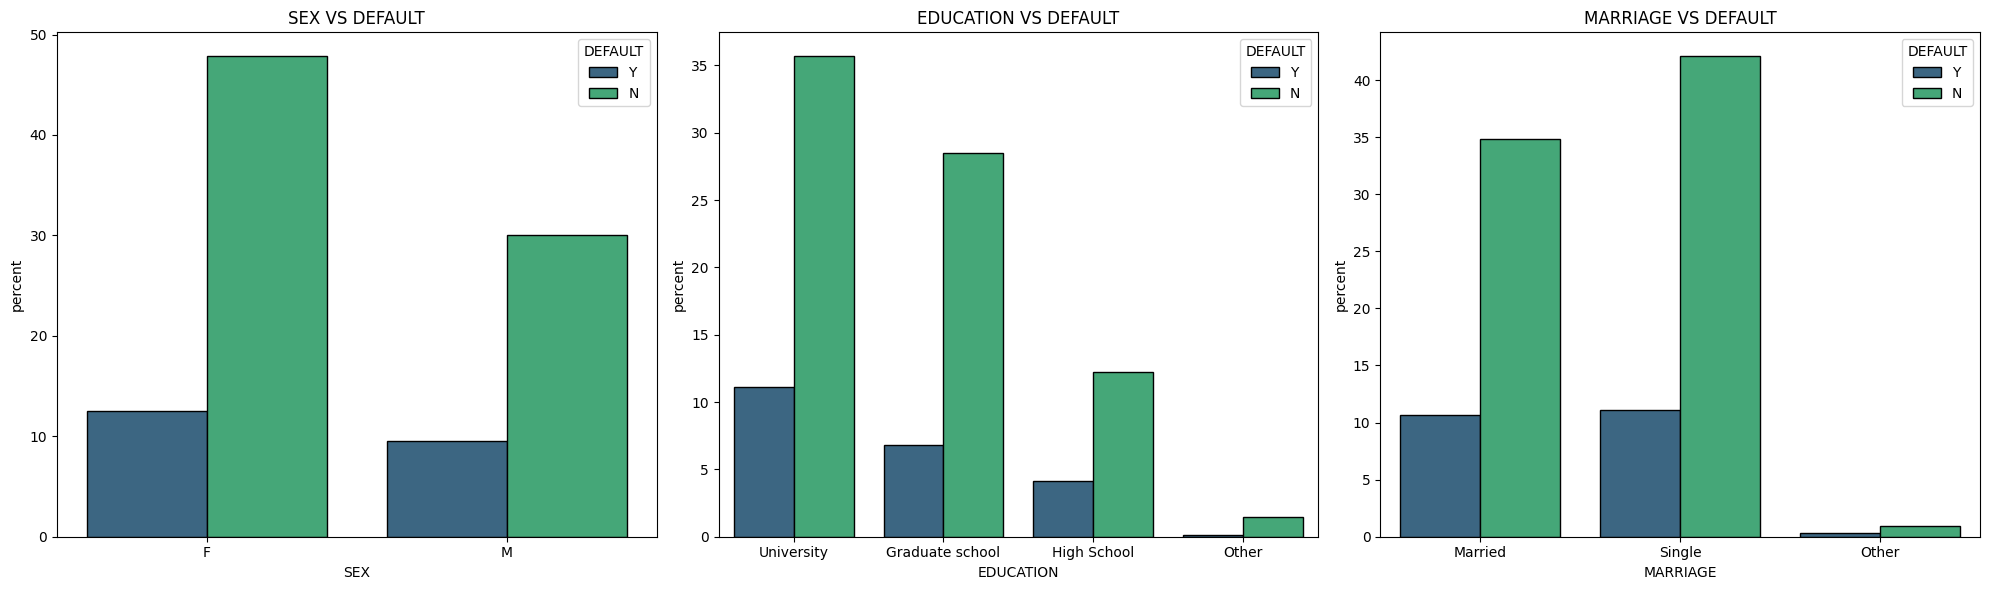

In [11]:
# Count Plot for (SEX,EDUCATION, MARRIAGE) vs DEFAULT

plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
sns.countplot(x=df1['SEX'], hue = df1['DEFAULT'], palette='viridis', ec='black', stat='percent').set_title('SEX VS DEFAULT')

plt.subplot(1, 3, 2)
sns.countplot(x=df1['EDUCATION'], hue = df1['DEFAULT'], palette='viridis', ec='black', stat='percent').set_title('EDUCATION VS DEFAULT')

plt.subplot(1, 3, 3)
sns.countplot(x=df1['MARRIAGE'], hue = df1['DEFAULT'], palette='viridis', ec='black', stat='percent').set_title('MARRIAGE VS DEFAULT')

plt.tight_layout()
plt.show()

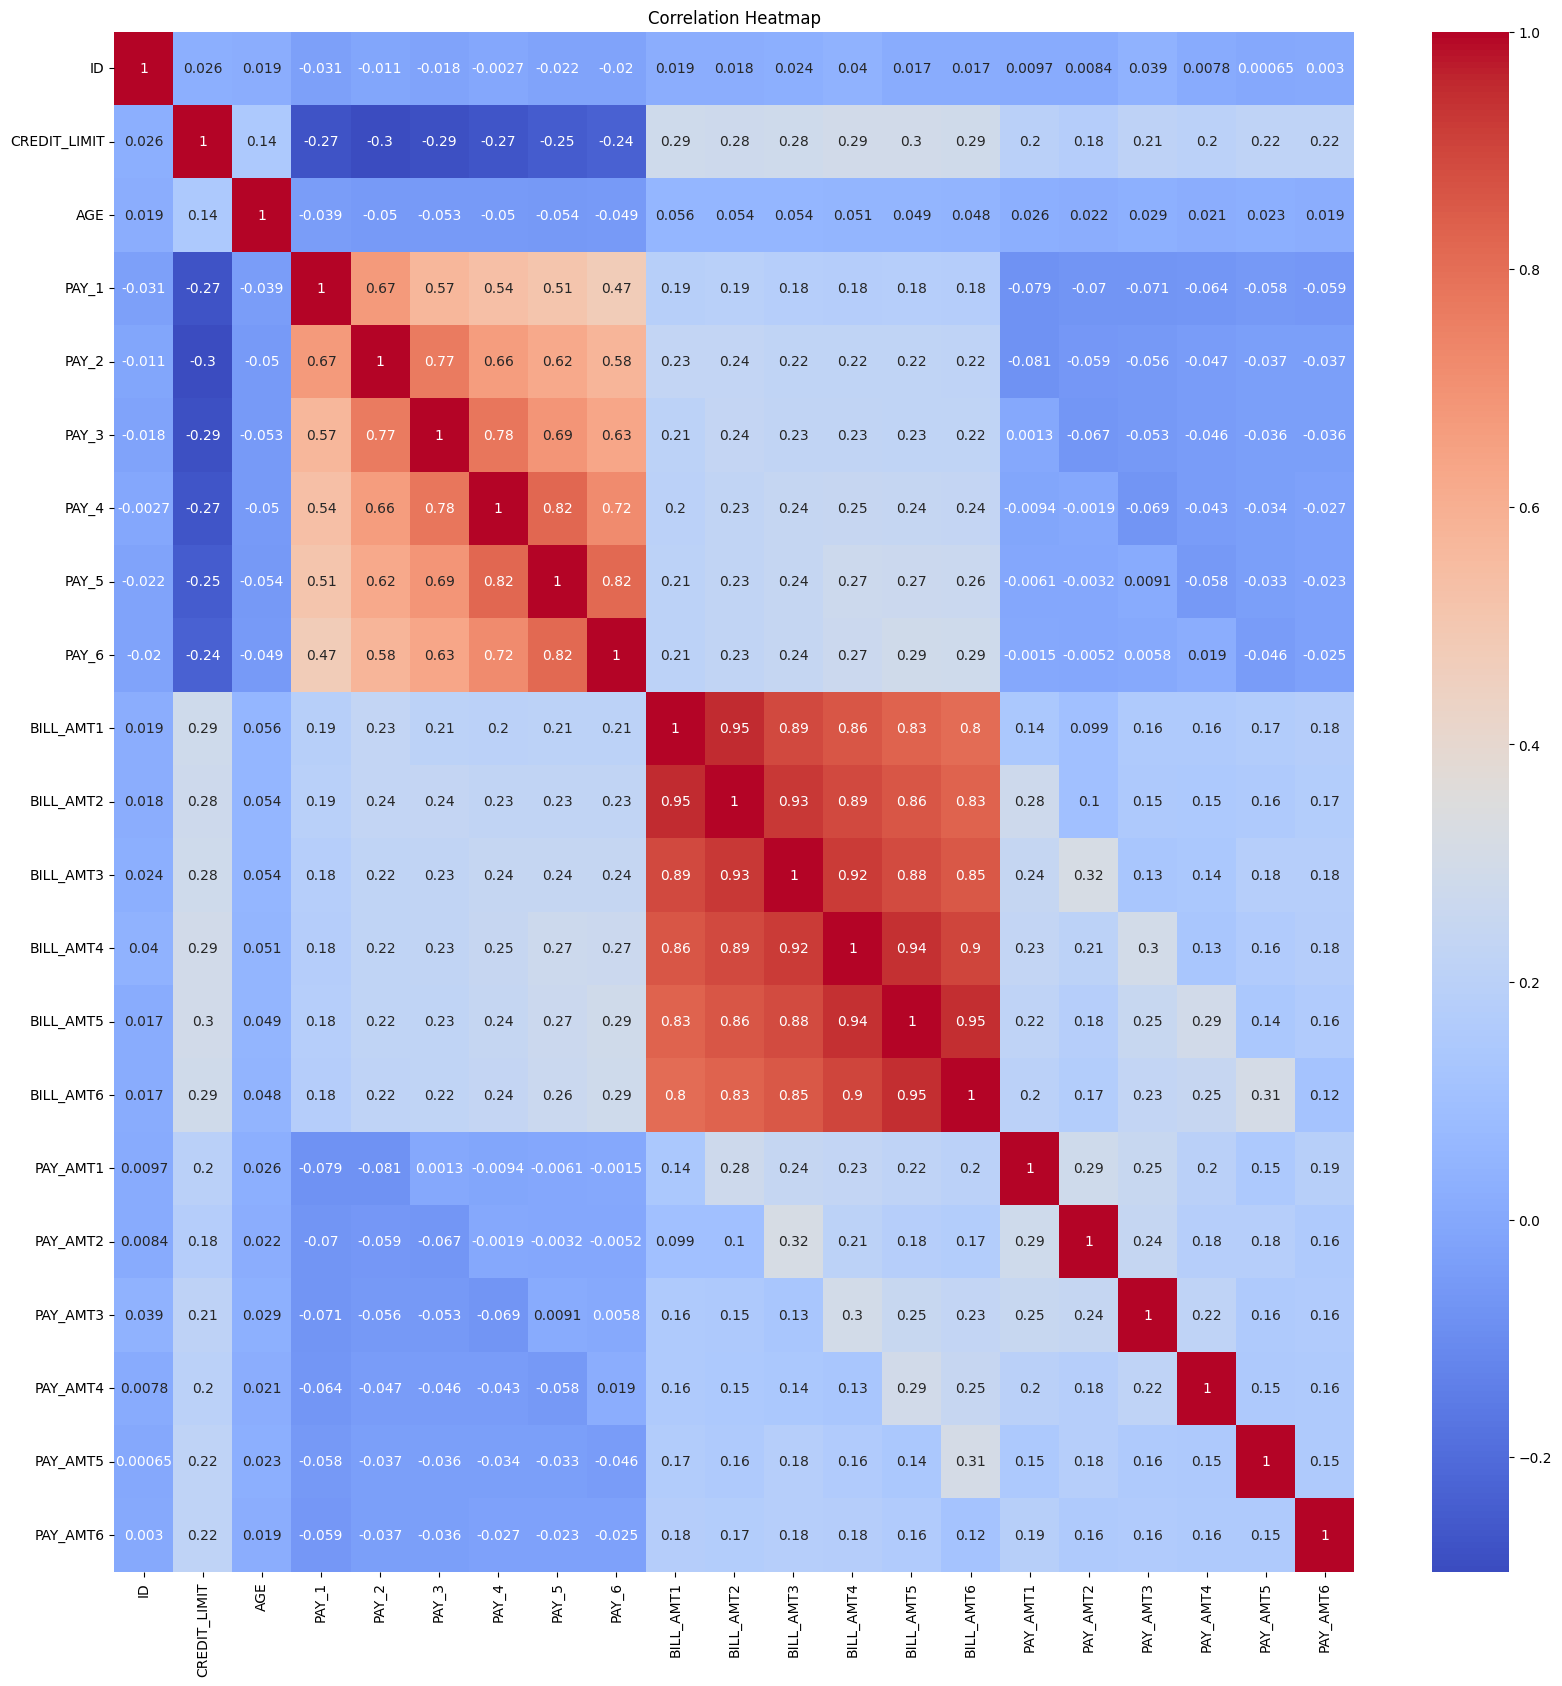

In [12]:
# Explore Correlation Between Features
plt.figure(figsize=(20, 20))
sns.heatmap(df1.corr(numeric_only=True), annot = True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [13]:
# Label Encoding for Binary Categorical Variables
df1['SEX'] = df1['SEX'].map({'F': 0, 'M': 1})
df1['DEFAULT'] = df1['DEFAULT'].map({'N': 0, 'Y': 1})

In [14]:
# One-Hot Encoding for Multi-Category Variables
df1 = pd.get_dummies(df1, columns=['EDUCATION', 'MARRIAGE'],dtype = int, drop_first=True)

In [15]:
# Feature Engineering

df1['CREDIT_UTILIZATION'] = df1['BILL_AMT1'] / df1['CREDIT_LIMIT']

for i in range(1, 7):
    df1[f'PAYMENT_TO_BILL_RATIO_{i}'] = df1[f'PAY_AMT{i}'] / (df1[f'BILL_AMT{i}'] + 1e-5)

df1['PAST_PAYMENT_CONSISTENCY'] = df1[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].std(axis=1)

In [16]:
# Define Features and Target
X = df1.drop(columns=['DEFAULT','ID'])
y = df1['DEFAULT']

In [17]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [18]:
# Apply SMOTE to Handle Imbalanced Data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [19]:
# Standardization
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_train_res[numerical_cols] = scaler.fit_transform(X_train_res[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


Evaluating Logistic Regression...
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.75      0.80      4673
           1       0.38      0.55      0.45      1327

    accuracy                           0.71      6000
   macro avg       0.62      0.65      0.63      6000
weighted avg       0.75      0.71      0.72      6000



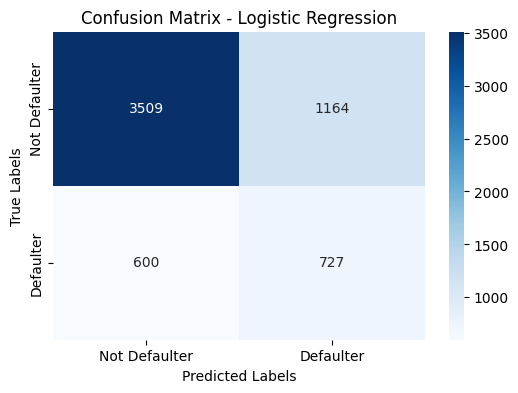

In [20]:
# Model 1: Logistic Regression
print("\nEvaluating Logistic Regression...")
log_reg = LogisticRegression(fit_intercept=True, max_iter=10000, random_state=42)
log_reg.fit(X_train_res, y_train_res)
y_pred_log_reg = log_reg.predict(X_test)
y_pred_proba_log_reg = log_reg.predict_proba(X_test)[:, 1]

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

# Confusion Matrix
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
labels = ['Not Defaulter', 'Defaulter']

plt.figure(figsize=(6, 4))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Evaluating Decision Tree...
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      4673
           1       0.38      0.47      0.42      1327

    accuracy                           0.71      6000
   macro avg       0.61      0.62      0.61      6000
weighted avg       0.74      0.71      0.72      6000



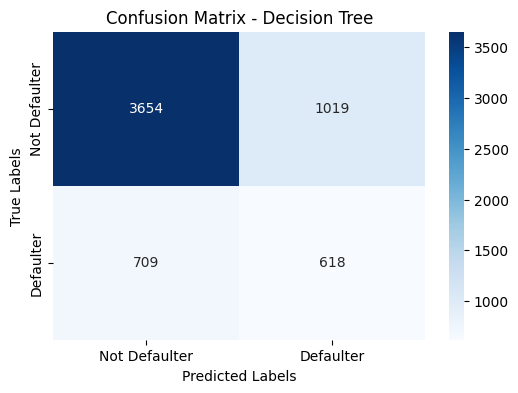

In [21]:
# Model 2: Decision Tree
print("\nEvaluating Decision Tree...")
dt = DecisionTreeClassifier()
dt.fit(X_train_res, y_train_res)
y_pred_dt = dt.predict(X_test)
y_pred_proba_dt = dt.predict_proba(X_test)[:, 1]

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix
cm_log_reg = confusion_matrix(y_test, y_pred_dt)
labels = ['Not Defaulter', 'Defaulter']

plt.figure(figsize=(6, 4))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Evaluating Random Forest...
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      4673
           1       0.55      0.47      0.50      1327

    accuracy                           0.80      6000
   macro avg       0.70      0.68      0.69      6000
weighted avg       0.79      0.80      0.79      6000



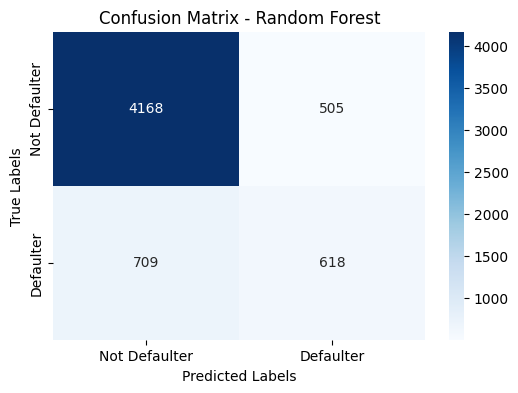

In [22]:
# Model 3: Random Forest
print("\nEvaluating Random Forest...")
rf = RandomForestClassifier()
rf.fit(X_train_res, y_train_res)
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_log_reg = confusion_matrix(y_test, y_pred_rf)
labels = ['Not Defaulter', 'Defaulter']

plt.figure(figsize=(6, 4))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Evaluating XGBoost...
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      4673
           1       0.54      0.43      0.48      1327

    accuracy                           0.79      6000
   macro avg       0.69      0.66      0.68      6000
weighted avg       0.78      0.79      0.78      6000



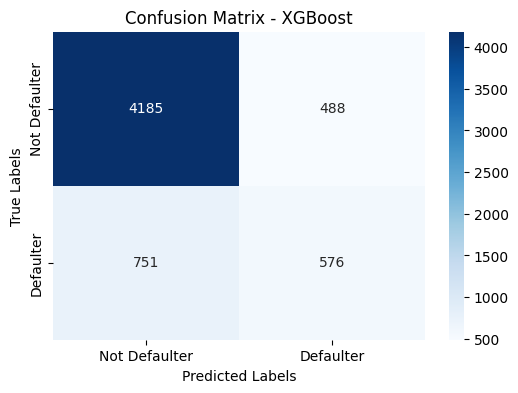

In [23]:
# Model 4: XGBoost
print("\nEvaluating XGBoost...")
xgb = XGBClassifier()
xgb.fit(X_train_res, y_train_res)
y_pred_xgb = xgb.predict(X_test)
y_pred_proba_xgb = xgb.predict_proba(X_test)[:, 1]

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
cm_log_reg = confusion_matrix(y_test, y_pred_xgb)
labels = ['Not Defaulter', 'Defaulter']

plt.figure(figsize=(6, 4))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [24]:
print("ROC-AUC Score for logistic regression:", roc_auc_score(y_test, y_pred_proba_log_reg))
print("ROC-AUC Score for decision tree:", roc_auc_score(y_test, y_pred_proba_rf))
print("ROC-AUC Score for random forest:", roc_auc_score(y_test, y_pred_proba_dt))
print("ROC-AUC Score for XGBoost:", roc_auc_score(y_test, y_pred_proba_xgb))

ROC-AUC Score for logistic regression: 0.6924908616592198
ROC-AUC Score for decision tree: 0.7477589758285303
ROC-AUC Score for random forest: 0.6240217214090921
ROC-AUC Score for XGBoost: 0.7425249606076111


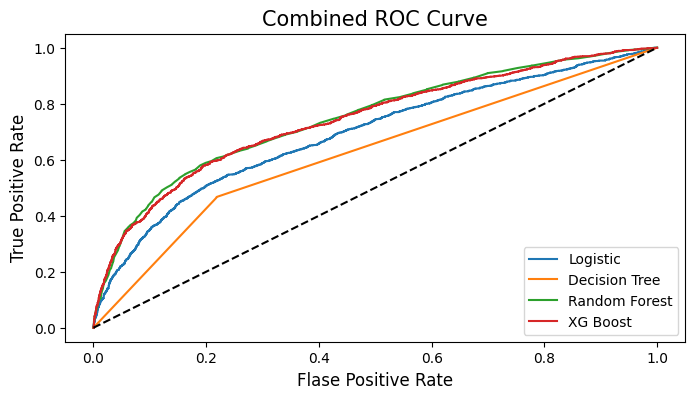

In [25]:
# Combined ROC-AUC 
fig = plt.figure(figsize=(8,4)) 

fpr_logi, tpr_logi, _logi = roc_curve(y_test,  y_pred_proba_log_reg)
fpr_dtc, tpr_dtc, _dtc = roc_curve(y_test,  y_pred_proba_dt)
fpr_rfc, tpr_rfc, _rfc = roc_curve(y_test,  y_pred_proba_rf)
fpr_xgb, tpr_xgb, _xgb = roc_curve(y_test,  y_pred_proba_xgb)

plt.plot(fpr_logi, tpr_logi)
plt.plot(fpr_dtc, tpr_dtc)
plt.plot(fpr_rfc, tpr_rfc)
plt.plot(fpr_xgb, tpr_xgb)

plt.plot([0,1], [0,1], color='black', linestyle='--')

plt.xlabel("Flase Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title('Combined ROC Curve', fontsize=15)

plt.legend(["Logistic", "Decision Tree", "Random Forest", "XG Boost"], prop={'size':10}, loc='lower right' )